# In this notebook we will be applying our feature scaling of car data
- #### first we will normally see or data.
- #### then we will test split it by sklearn.model_selection 'train_test_split
- #### then we will sample it by Min_max_scalar funtion of sklearn.preprocessing
- #### then ploting the all

In [141]:
import pandas as pd
import matplotlib as mp
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

temp = pd.read_csv('cardata.csv')
temp.head()

Car_Name  Year  Selling_Price  Present_Price  Kms_Driven Fuel_Type  \
0     ritz  2014           3.35           5.59       27000    Petrol   
1      sx4  2013           4.75           9.54       43000    Diesel   
2     ciaz  2017           7.25           9.85        6900    Petrol   
3  wagon r  2011           2.85           4.15        5200    Petrol   
4    swift  2014           4.60           6.87       42450    Diesel   

  Seller_Type Transmission  Owner  
0      Dealer       Manual      0  
1      Dealer       Manual      0  
2      Dealer       Manual      0  
3      Dealer       Manual      0  
4      Dealer       Manual      0

In [143]:
data = temp[['Year', 'Present_Price','Kms_Driven']]
data

Year  Present_Price  Kms_Driven
0    2014           5.59       27000
1    2013           9.54       43000
2    2017           9.85        6900
3    2011           4.15        5200
4    2014           6.87       42450
..    ...            ...         ...
296  2016          11.60       33988
297  2015           5.90       60000
298  2009          11.00       87934
299  2017          12.50        9000
300  2016           5.90        5464

[301 rows x 3 columns]

<Axes: ylabel='Density'>

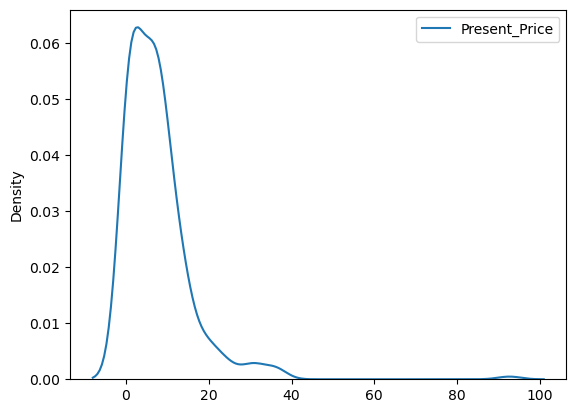

In [145]:
sns.kdeplot(data[['Present_Price']])

<Axes: ylabel='Density'>

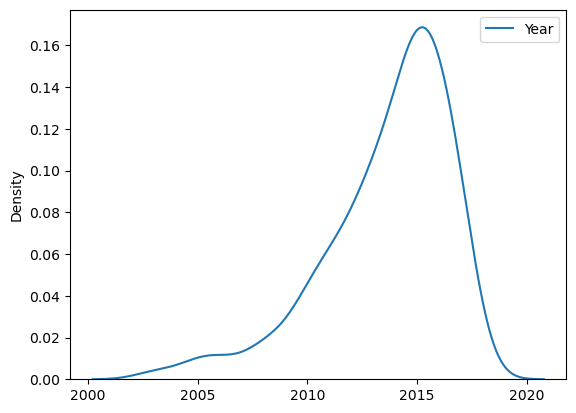

In [147]:
sns.kdeplot(data[['Year']])

<Axes: xlabel='Year', ylabel='Present_Price'>

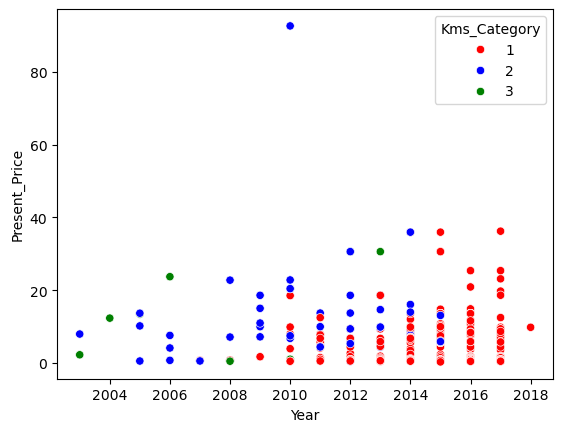

In [151]:
data.loc[:,'Kms_Category'] = pd.cut(data['Kms_Driven'],
                              bins=[0, 50000, 100000, float('inf')],
                              labels=[1, 2, 3])

color_dict = {1: 'red', 2: 'blue', 3: 'green'}

sns.scatterplot(x='Year', y='Present_Price', hue='Kms_Category', data=data, palette=color_dict)


In [153]:
from sklearn.model_selection import train_test_split
x_train,X_test,y_train,Y_test = train_test_split(data.drop('Year',axis=1),
                                                 data['Year'],
                                                 test_size = 0.3,
                                                 random_state = 0)
x_train.shape,X_test.shape

((210, 3), (91, 3))

In [155]:
# scalling of the data here
from sklearn.preprocessing import MinMaxScaler
scalar = MinMaxScaler()

# fit scalar to the train_test
scalar.fit(x_train)
# transform the x_train and X_test
x_trained_scaled = scalar.transform(x_train)
X_test_scaled = scalar.transform(X_test)

In [157]:
x_trained_scaled = pd.DataFrame(x_trained_scaled, columns=x_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns = X_test.columns)

In [159]:
x_train

Present_Price  Kms_Driven Kms_Category
222           7.60       77632            2
283          11.80        9010            1
44            2.69       50000            1
245           9.40       71000            2
191           0.57       25000            1
..             ...         ...          ...
251           9.90       56701            2
192           0.75       49000            1
117           1.90       14000            1
47            4.15       65000            2
172           0.64       13700            1

[210 rows x 3 columns]

In [161]:
x_trained_scaled

Present_Price  Kms_Driven  Kms_Category
0         0.078890    0.154418           0.5
1         0.124404    0.017037           0.0
2         0.025683    0.099099           0.0
3         0.098396    0.141141           0.5
4         0.002709    0.049049           0.0
..             ...         ...           ...
205       0.103814    0.112515           0.5
206       0.004660    0.097097           0.0
207       0.017122    0.027027           0.0
208       0.041504    0.129129           0.5
209       0.003468    0.026426           0.0

[210 rows x 3 columns]

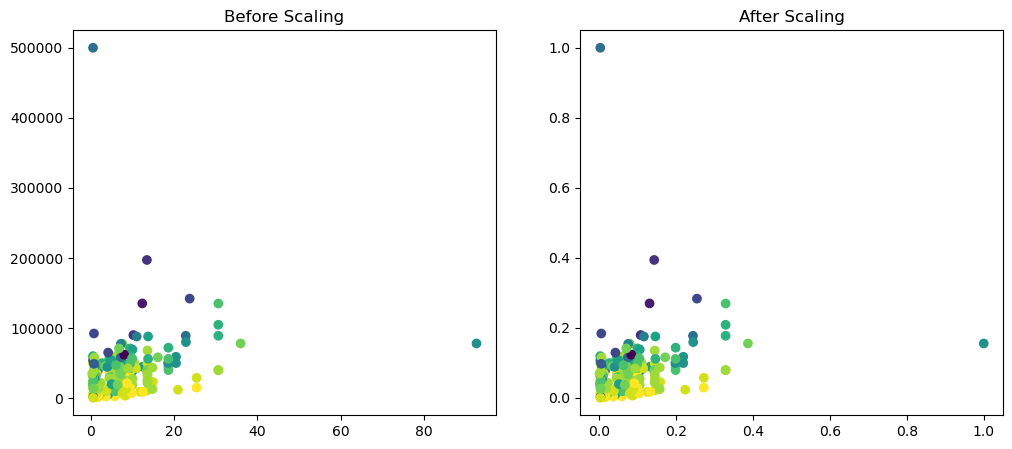

In [167]:
fig, (ax1,ax2) = plt.subplots(ncols = 2,figsize=(12,5))
ax1.scatter(x_train['Present_Price'], x_train['Kms_Driven'],c=y_train)
ax1.set_title("Before Scaling")
ax2.scatter(x_trained_scaled['Present_Price'], x_trained_scaled['Kms_Driven'],c=y_train)
ax2.set_title("After Scaling")
plt.show()

## the scale has been shrink from 500000/80 to 1/1